## Italian COVID 19 data from the CIVIL PROTECTION - DataFrame pandas example

Load the COVID 19 data for the Italian provinces and regions and apply and apply some DataFrame operations.

#### Table of Contents
1. [Read Data with pandas](#section1)
1. [Get English names' columns](#section2)
1. [pandas' swiss knife](#section3)
1. [Data selection](#section4)
1. [Data manipulation](#section5)
1. [Plotting df](#section6)

### Setup

In [1]:
%run ../scripts/setup.ipynb

<a id='section1'></a>
### 1. Read Data with `pandas`

`pandas` has several function to read many data formats: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [2]:
covid_regions_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
covid_provinces_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"

We are going to read data with the [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [3]:
cr_df = pd.read_csv(covid_regions_url)
cp_df = pd.read_csv(covid_provinces_url)

<a id='section3'></a>
### 3. pandas' swiss knife

The following functions/attributes of the pandas dataframe are very usefull, especially during the first data inspection and particularly using a jupyter notebook.

Get the variables' names in the dataframe by using [`.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html).

In [4]:
cr_df.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [5]:
region_it_en = {'data': 'date',
 'stato': 'country',
 'codice_regione': 'region_code',
 'denominazione_regione': 'region_name',
 'lat': 'latitude',
 'long': 'longitude',
 'ricoverati_con_sintomi': 'hospitalized_symptoms',
 'terapia_intensiva': 'intensive_care',
 'totale_ospedalizzati': 'total_hospitalized',
 'isolamento_domiciliare': 'home_isolation',
 'totale_positivi': 'total_positives',
 'variazione_totale_positivi': 'change_total_positives',
 'nuovi_positivi': 'new_positives',
 'dimessi_guariti': 'hospital_discharged',
 'deceduti': 'deceased_patients',
 'casi_da_sospetto_diagnostico': 'dubious_diagnosis_cases',
 'casi_da_screening': 'screening_cases',
 'totale_casi': 'total_cases',
 'tamponi': 'swab_tests',
 'casi_testati': 'test_cases',
 'ingressi_terapia_intensiva': 'new_intensive_care',
 'totale_positivi_test_molecolare': 'molecular_test_total_positives',
 'totale_positivi_test_antigenico_rapido': 'antigen_test_total_positives',
 'tamponi_test_molecolare': 'molecular_swab_tests',
 'tamponi_test_antigenico_rapido': 'antigen_swab_tests'}

In [6]:
cp_df.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note', 'codice_nuts_1', 'codice_nuts_2',
       'codice_nuts_3'],
      dtype='object')

In [7]:
province_it_en = {'data': 'date',
 'stato': 'country',
 'codice_regione': 'region_code',
 'denominazione_regione': 'region_name',
 'codice_provincia': 'province_code',
 'denominazione_provincia': 'province_name',
 'sigla_provincia': 'province_short_name',
 'lat': 'latitude',
 'long': 'longitude',
 'totale_casi': 'total_cases'}

Before renaming the columns with the [`rename()`]((https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)) function, remove unuseful columns with the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function without the `inplace` parameter.

In [8]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying a

In [9]:
cp_df_new = cp_df.drop(columns=['note','codice_nuts_1','codice_nuts_2', 'codice_nuts_3'])
cr_df_new = cr_df.drop(columns=['note','note_test','note_casi','codice_nuts_1','codice_nuts_2'])

The previous lines are equivalent to 

```py
cp_df_new = cp_df.drop(['note','codice_nuts_1','codice_nuts_2', 'codice_nuts_3'], axis=1)
```

We can do the same by using the `inplace` parameter.

In [10]:
cp_df_new.rename(columns=province_it_en, inplace=True)
cp_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'province_code',
       'province_name', 'province_short_name', 'latitude', 'longitude',
       'total_cases'],
      dtype='object')

In [11]:
cr_df_new.rename(columns=region_it_en, inplace=True)
cr_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'latitude',
       'longitude', 'hospitalized_symptoms', 'intensive_care',
       'total_hospitalized', 'home_isolation', 'total_positives',
       'change_total_positives', 'new_positives', 'hospital_discharged',
       'deceased_patients', 'dubious_diagnosis_cases', 'screening_cases',
       'total_cases', 'swab_tests', 'test_cases', 'new_intensive_care',
       'molecular_test_total_positives', 'antigen_test_total_positives',
       'molecular_swab_tests', 'antigen_swab_tests'],
      dtype='object')

Get the first and latest couple of lines in the dataframe by using the [`.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [`.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) functions respectively.

In [12]:
cr_df_new.head(2)

date country  region_code region_name   latitude  longitude  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo  42.351222  13.398438   
1  2020-02-24T18:00:00     ITA           17  Basilicata  40.639471  15.805148   

   hospitalized_symptoms  intensive_care  total_hospitalized  home_isolation  \
0                      0               0                   0               0   
1                      0               0                   0               0   

   ...  dubious_diagnosis_cases  screening_cases  total_cases  swab_tests  \
0  ...                      NaN              NaN            0           5   
1  ...                      NaN              NaN            0           0   

   test_cases  new_intensive_care  molecular_test_total_positives  \
0         NaN                 NaN                             NaN   
1         NaN                 NaN                             NaN   

   antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
0                           NaN                   NaN                 NaN  
1                           NaN                   NaN                 NaN  

[2 rows x 25 columns]

In [13]:
cr_df_new.tail(2)

date country  region_code    region_name   latitude  \
20662  2022-11-03T17:00:00     ITA            2  Valle d'Aosta  45.737503   
20663  2022-11-03T17:00:00     ITA            5         Veneto  45.434905   

       longitude  hospitalized_symptoms  intensive_care  total_hospitalized  \
20662   7.320149                     14               0                  14   
20663  12.338452                    679              34                 713   

       home_isolation  ...  dubious_diagnosis_cases  screening_cases  \
20662             808  ...                      NaN              NaN   
20663           49203  ...                      NaN              NaN   

       total_cases  swab_tests  test_cases  new_intensive_care  \
20662        47777      569119    142791.0                 0.0   
20663      2431724    34524377   5166878.0                 6.0   

       molecular_test_total_positives  antigen_test_total_positives  \
20662                         16156.0                       31621.0   
20663                        972736.0                     1458988.0   

       molecular_swab_tests  antigen_swab_tests  
20662              144887.0            424232.0  
20663            10897155.0          23627222.0  

[2 rows x 25 columns]

In [14]:
cp_df_new.head(2)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   

  province_name province_short_name   latitude  longitude  total_cases  
0      L'Aquila                  AQ  42.351222  13.398438            0  
1        Teramo                  TE  42.658918  13.704400            0

In [15]:
cp_df_new.tail(2)

date country  region_code region_name  province_code  \
144052  2022-11-03T17:00:00     ITA            5      Veneto            899   
144053  2022-11-03T17:00:00     ITA            5      Veneto            999   

                               province_name province_short_name  latitude  \
144052    Fuori Regione / Provincia Autonoma                 NaN       NaN   
144053  In fase di definizione/aggiornamento                 NaN       NaN   

        longitude  total_cases  
144052        NaN        36954  
144053        NaN        11869

We can check the number of elements in the dataframe by using the [len()](https://docs.python.org/3/library/functions.html#len) function (that it is not a pandas function), either the [.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape).

In [16]:
len(cr_df_new)

20664

In [17]:
cr_df_new.shape

(20664, 25)

[unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) and [nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) functions can be applied to specific columns of the dataframe.

In [18]:
cr_df_new['region_name'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [19]:
cr_df_new['region_name'].nunique()

21

[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function provides information about the various objects in the dataframe.

In [20]:
cr_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20664 entries, 0 to 20663
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            20664 non-null  object 
 1   country                         20664 non-null  object 
 2   region_code                     20664 non-null  int64  
 3   region_name                     20664 non-null  object 
 4   latitude                        20664 non-null  float64
 5   longitude                       20664 non-null  float64
 6   hospitalized_symptoms           20664 non-null  int64  
 7   intensive_care                  20664 non-null  int64  
 8   total_hospitalized              20664 non-null  int64  
 9   home_isolation                  20664 non-null  int64  
 10  total_positives                 20664 non-null  int64  
 11  change_total_positives          20664 non-null  int64  
 12  new_positives                   

To detect missing values we can use the [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) function.

In [21]:
cr_df_new.isnull().sum(0)

date                                  0
country                               0
region_code                           0
region_name                           0
latitude                              0
longitude                             0
hospitalized_symptoms                 0
intensive_care                        0
total_hospitalized                    0
home_isolation                        0
total_positives                       0
change_total_positives                0
new_positives                         0
hospital_discharged                   0
deceased_patients                     0
dubious_diagnosis_cases           17262
screening_cases                   17262
total_cases                           0
swab_tests                            0
test_cases                         1155
new_intensive_care                 5943
molecular_test_total_positives     6846
antigen_test_total_positives       6846
molecular_swab_tests               6846
antigen_swab_tests                 6846


If `inplace=True` is omitted the dataframe is not reordered. This argument is present in several pandas dataframe's functions. Check what we get when we use the `sort_values()` function.

In [22]:
cr_df_new.sort_values(by=['deceased_patients'], ascending=False)# , inplace=True)

date country  region_code region_name   latitude  \
20651  2022-11-03T17:00:00     ITA            3   Lombardia  45.466794   
20630  2022-11-02T17:00:00     ITA            3   Lombardia  45.466794   
20609  2022-11-01T17:00:00     ITA            3   Lombardia  45.466794   
20588  2022-10-31T17:00:00     ITA            3   Lombardia  45.466794   
20567  2022-10-30T17:00:00     ITA            3   Lombardia  45.466794   
...                    ...     ...          ...         ...        ...   
149    2020-03-02T18:00:00     ITA           18    Calabria  38.905976   
296    2020-03-09T18:00:00     ITA           18    Calabria  38.905976   
150    2020-03-02T18:00:00     ITA           15    Campania  40.839566   
295    2020-03-09T18:00:00     ITA           17  Basilicata  40.639471   
0      2020-02-24T18:00:00     ITA           13     Abruzzo  42.351222   

       longitude  hospitalized_symptoms  intensive_care  total_hospitalized  \
20651   9.190347                   1042              27                1069   
20630   9.190347                   1038              24                1062   
20609   9.190347                   1034              24                1058   
20588   9.190347                   1035              23                1058   
20567   9.190347                   1041              23                1064   
...          ...                    ...             ...                 ...   
149    16.594402                      0               0                   0   
296    16.594402                      8               0                   8   
150    14.250850                      4               0                   4   
295    15.805148                      2               0                   2   
0      13.398438                      0               0                   0   

       home_isolation  ...  dubious_diagnosis_cases  screening_cases  \
20651           58278  ...                      NaN              NaN   
20630           65145  ...                      NaN              NaN   
20609           66230  ...                      NaN              NaN   
20588           69179  ...                      NaN              NaN   
20567           70621  ...                      NaN              NaN   
...               ...  ...                      ...              ...   
149                 1  ...                      NaN              NaN   
296                 1  ...                      NaN              NaN   
150                13  ...                      NaN              NaN   
295                 3  ...                      NaN              NaN   
0                   0  ...                      NaN              NaN   

       total_cases  swab_tests  test_cases  new_intensive_care  \
20651      3797984    42685688   8914960.0                 7.0   
20630      3790039    42639799   8909814.0                 4.0   
20609      3788838    42630058   8908598.0                 3.0   
20588      3782596    42588581   8904558.0                 1.0   
20567      3781446    42579701   8903554.0                 0.0   
...            ...         ...         ...                 ...   
149              1          39         NaN                 NaN   
296             11         173         NaN                 NaN   
150             17         373         NaN                 NaN   
295              5         135         NaN                 NaN   
0                0           5         NaN                 NaN   

       molecular_test_total_positives  antigen_test_total_positives  \
20651                       1507817.0                     2290167.0   
20630                       1507396.0                     2282643.0   
20609                       1507279.0                     2281559.0   
20588                       1506869.0                     2275727.0   
20567                       1506785.0                     2274661.0   
...                               ...                           ...   
149                          

Get a summary of values in the dataframe with the [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function.

In [23]:
cr_df_new.describe()

region_code      latitude     longitude  hospitalized_symptoms  \
count  20664.000000  20664.000000  20664.000000           20664.000000   
mean      11.857143     43.046293     12.225955             505.313347   
std        6.273950      2.488841      2.659012             934.219121   
min        1.000000     38.115697      7.320149               0.000000   
25%        7.000000     41.125596     11.121231              50.000000   
50%       12.000000     43.616760     12.388247             189.000000   
75%       17.000000     45.434905     13.768136             548.000000   
max       22.000000     46.499335     16.867367           12077.000000   

       intensive_care  total_hospitalized  home_isolation  total_positives  \
count    20664.000000        20664.000000    20664.000000     20664.000000   
mean        51.334737          556.648084    23155.740563     23712.388357   
std        103.689710         1032.987722    43988.089230     44408.430659   
min          0.000000            0.000000        0.000000         0.000000   
25%          4.000000           56.000000     1146.000000      1263.750000   
50%         16.000000          207.000000     6183.500000      6490.500000   
75%         49.000000          605.000000    24074.750000     24977.000000   
max       1381.000000        13328.000000   574548.000000    578257.000000   

       change_total_positives  new_positives  ...  dubious_diagnosis_cases  \
count            20664.000000   20664.000000  ...              3402.000000   
mean                20.561847    1129.560492  ...             16472.772193   
std               2216.543965    2557.629946  ...             32188.413270   
min             -50797.000000    -229.000000  ...                 0.000000   
25%                -94.000000      46.750000  ...              2052.250000   
50%                  2.000000     275.000000  ...              5290.500000   
75%                139.000000    1106.000000  ...             19285.750000   
max              47483.000000   52693.000000  ...            305002.000000   

       screening_cases   total_cases    swab_tests    test_cases  \
count       3402.00000  2.066400e+04  2.066400e+04  1.950900e+04   
mean        6319.39565  3.357863e+05  4.630117e+06  1.521108e+06   
std        15054.35195  5.631240e+05  7.126749e+06  1.864566e+06   
min            0.00000  0.000000e+00  0.000000e+00  3.482000e+03   
25%          117.00000  1.415650e+04  3.289880e+05  2.355270e+05   
50%         1493.00000  9.433450e+04  1.650612e+06  7.658610e+05   
75%         5469.00000  3.816940e+05  5.506794e+06  2.087073e+06   
max       113150.00000  3.797984e+06  4.268569e+07  9.871493e+06   

       new_intensive_care  molecular_test_total_positives  \
count        14721.000000                    1.381800e+04   
mean             3.483867                    2.919835e+05   
std              6.153529                    3.141565e+05   
min             -2.000000                    7.382000e+03   
25%              0.000000                    6.473100e+04   
50%              1.000000                    1.818760e+05   
75%              4.000000                    4.233355e+05   
max             86.000000                    1.507817e+06   

       antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
count                  1.381800e+04          1.381800e+04        1.381800e+04  
mean                   1.969562e+05          3.322413e+06        3.375228e+06  
std                    3.575637e+05          3.380020e+06        4.882767e+06  
min                    0.000000e+00          6.615200e+04        0.000000e+00  
25%                    2.410000e+02          8.495518e+05        3.139945e+05  
50%                    1.596700e+04          2.007382e+06        1.492186e+06  
75%                    2.166222e+05          4.781067e+06        3.983860e+06  
max                    2.290167e+06          1.671786e+07        2.596783e+07  

[8 rows x 22 columns]

The [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function computes correlation between the various variables in the dataframe.

In [24]:
cr_df_new.corr()

region_code  latitude  longitude  \
region_code                        1.000000 -0.541392   0.504055   
latitude                          -0.541392  1.000000  -0.547164   
longitude                          0.504055 -0.547164   1.000000   
hospitalized_symptoms             -0.273484  0.100119  -0.172665   
intensive_care                    -0.236045  0.093004  -0.142491   
total_hospitalized                -0.271029  0.099882  -0.170459   
home_isolation                    -0.088093 -0.085697   0.015507   
total_positives                   -0.093564 -0.082563   0.011395   
change_total_positives            -0.003852  0.000895  -0.001629   
new_positives                     -0.146605  0.026191  -0.045321   
hospital_discharged               -0.216885  0.063561  -0.083962   
deceased_patients                 -0.422557  0.219888  -0.258360   
dubious_diagnosis_cases           -0.380589  0.245819  -0.283101   
screening_cases                   -0.263400  0.121292  -0.170034   
total_cases                       -0.218156  0.056502  -0.081924   
swab_tests                        -0.272505  0.121129  -0.130548   
test_cases                        -0.186341 -0.063029  -0.080845   
new_intensive_care                -0.188301  0.040510  -0.042242   
molecular_test_total_positives    -0.349720  0.089776  -0.127208   
antigen_test_total_positives      -0.182374  0.040426  -0.065112   
molecular_swab_tests              -0.393110  0.145967  -0.148723   
antigen_swab_tests                -0.299864  0.150374  -0.171241   

                                hospitalized_symptoms  intensive_care  \
region_code                                 -0.273484       -0.236045   
latitude                                     0.100119        0.093004   
longitude                                   -0.172665       -0.142491   
hospitalized_symptoms                        1.000000        0.947397   
intensive_care                               0.947397        1.000000   
total_hospitalized                           0.999484        0.957191   
home_isolation                               0.406651        0.292404   
total_positives                              0.426051        0.311901   
change_total_positives                      -0.000027        0.017601   
new_positives                                0.326048        0.223329   
hospital_discharged                          0.121278       -0.006480   
deceased_patients                            0.371408        0.290270   
dubious_diagnosis_cases                      0.734274        0.750390   
screening_cases                              0.859354        0.844135   
total_cases                                  0.153208        0.022214   
swab_tests                                   0.152075        0.035196   
test_cases                                   0.258681        0.164698   
new_intensive_care                           0.804109        0.836213   
molecular_test_total_positives               0.411750        0.219199   
antigen_test_total_positives                 0.113103       -0.100429   
molecular_swab_tests                         0.397807        0.231434   
antigen_swab_tests                           0.182634       -0.017606   

                                total_hospitalized  home_isolation  \
region_code                              -0.271029       -0.088093   
latitude                                  0.099882       -0.085697   
longitude                                -0.170459        0.015507   
hospitalized_symptoms                     0.999484        0.406651   
intensive_care                            0.957191        0.292404   
total_hospitalized                        1.000000        0.397121   
home_isolation                            0.397121        1.000000   
total_positives                           0.416623        0.999772   
change_total_positives                    0.001742        0.024207   
new_positives                             0.317290        0.810552   
hospital_discharg

In [25]:
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame'
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
 

<a id='section4'></a>
### 4. Data selection

Here we will see how to "reduce" the data present in a dataframe acting on the dataframe's columns and on the rows  as well.

#### column selection

In [26]:
cr_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'latitude',
       'longitude', 'hospitalized_symptoms', 'intensive_care',
       'total_hospitalized', 'home_isolation', 'total_positives',
       'change_total_positives', 'new_positives', 'hospital_discharged',
       'deceased_patients', 'dubious_diagnosis_cases', 'screening_cases',
       'total_cases', 'swab_tests', 'test_cases', 'new_intensive_care',
       'molecular_test_total_positives', 'antigen_test_total_positives',
       'molecular_swab_tests', 'antigen_swab_tests'],
      dtype='object')

In [27]:
cr_df_new['date']

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
20659    2022-11-03T17:00:00
20660    2022-11-03T17:00:00
20661    2022-11-03T17:00:00
20662    2022-11-03T17:00:00
20663    2022-11-03T17:00:00
Name: date, Length: 20664, dtype: object

In [28]:
cr_df_new.date

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
20659    2022-11-03T17:00:00
20660    2022-11-03T17:00:00
20661    2022-11-03T17:00:00
20662    2022-11-03T17:00:00
20663    2022-11-03T17:00:00
Name: date, Length: 20664, dtype: object

Each variable in the dataframe is a series object. https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [29]:
type(cr_df_new['date'])

pandas.core.series.Series

In [30]:
cr_df_new[['region_name','total_positives']]

region_name  total_positives
0             Abruzzo                0
1          Basilicata                0
2            Calabria                0
3            Campania                0
4      Emilia-Romagna               18
...               ...              ...
20659         Sicilia            20802
20660         Toscana            50058
20661          Umbria             4694
20662   Valle d'Aosta              822
20663          Veneto            49916

[20664 rows x 2 columns]

#### row selection

* [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) gets rows (and/or columns) with particular `labels` (if indexes are strings uses indexes labes).

* `iloc` gets rows (and/or columns) at integer locations (always numbers).

In [31]:
cr_df_new.index.values

array([    0,     1,     2, ..., 20661, 20662, 20663], dtype=int64)

In [32]:
cr_df_new.loc[1:3]

date country  region_code region_name   latitude  longitude  \
1  2020-02-24T18:00:00     ITA           17  Basilicata  40.639471  15.805148   
2  2020-02-24T18:00:00     ITA           18    Calabria  38.905976  16.594402   
3  2020-02-24T18:00:00     ITA           15    Campania  40.839566  14.250850   

   hospitalized_symptoms  intensive_care  total_hospitalized  home_isolation  \
1                      0               0                   0               0   
2                      0               0                   0               0   
3                      0               0                   0               0   

   ...  dubious_diagnosis_cases  screening_cases  total_cases  swab_tests  \
1  ...                      NaN              NaN            0           0   
2  ...                      NaN              NaN            0           1   
3  ...                      NaN              NaN            0          10   

   test_cases  new_intensive_care  molecular_test_total_positives  \
1         NaN                 NaN                             NaN   
2         NaN                 NaN                             NaN   
3         NaN                 NaN                             NaN   

   antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
1                           NaN                   NaN                 NaN  
2                           NaN                   NaN                 NaN  
3                           NaN                   NaN                 NaN  

[3 rows x 25 columns]

In [33]:
cr_df_new.loc[12557]

date                              2021-10-13T17:00:00
country                                           ITA
region_code                                         5
region_name                                    Veneto
latitude                                    45.434905
longitude                                   12.338452
hospitalized_symptoms                             144
intensive_care                                     33
total_hospitalized                                177
home_isolation                                   8946
total_positives                                  9123
change_total_positives                           -108
new_positives                                     348
hospital_discharged                            452440
deceased_patients                               11799
dubious_diagnosis_cases                           NaN
screening_cases                                   NaN
total_cases                                    473362
swab_tests                  

#### Mask

In [34]:
cp_df_new['region_name']=='Emilia-Romagna'

0         False
1         False
2         False
3         False
4         False
          ...  
144049    False
144050    False
144051    False
144052    False
144053    False
Name: region_name, Length: 144054, dtype: bool

In [35]:
m = cp_df_new['region_name']=='Emilia-Romagna'

In [36]:
m.unique()

array([False,  True])

In [37]:
cp_df_new[cp_df_new['region_name']=='Emilia-Romagna'].head(3)

date country  region_code     region_name  province_code  \
20  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             33   
21  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             34   
22  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             35   

         province_name province_short_name   latitude  longitude  total_cases  
20            Piacenza                  PC  45.051935   9.692633            0  
21               Parma                  PR  44.801074  10.328350            0  
22  Reggio nell'Emilia                  RE  44.697353  10.630080            0

In [38]:
cp_df_new[(cp_df_new['region_name']=='Emilia-Romagna') & (cp_df_new['total_cases'] > 1000)].head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

actually what happens ....

In [39]:
m1 = cp_df_new['region_name']=='Emilia-Romagna'
m2 = cp_df_new['total_cases'] > 1000

In [40]:
cp_df_new[m1 & m2].head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

#### query

The [query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) function is the best choice if you have several conditions to be applied on the row selection.

In [41]:
cp_df_new.query("(region_name == 'Emilia-Romagna') and (total_cases > 1000)").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

In [42]:
nc = 1000
cp_df_new.query("(region_name == 'Emilia-Romagna') and (total_cases > @nc)").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

with f-strings

In [43]:
cp_df_new.query(f"(region_name == 'Emilia-Romagna') and (total_cases > {nc})").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

#### AND or OR

In [44]:
cp_df_new.query(f"(region_name == 'Emilia-Romagna') or (total_cases > {nc})").head(3)

date country  region_code     region_name  province_code  \
20  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             33   
21  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             34   
22  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             35   

         province_name province_short_name   latitude  longitude  total_cases  
20            Piacenza                  PC  45.051935   9.692633            0  
21               Parma                  PR  44.801074  10.328350            0  
22  Reggio nell'Emilia                  RE  44.697353  10.630080            0

#### .isin
--> avoid OR OR OR OR OR OR....

[.isin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)

In [45]:
cp_df_new['region_name'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [46]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania']

In [47]:
cp_df_new[cp_df_new['region_name'].isin(regions)].head(2)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   

  province_name province_short_name   latitude  longitude  total_cases  
0      L'Aquila                  AQ  42.351222  13.398438            0  
1        Teramo                  TE  42.658918  13.704400            0

In [48]:
cp_df_new[cp_df_new['region_name'].isin(regions)].tail(2)

date country  region_code region_name  province_code  \
143927  2022-11-03T17:00:00     ITA           15    Campania            883   
143928  2022-11-03T17:00:00     ITA           15    Campania            983   

                               province_name province_short_name  latitude  \
143927    Fuori Regione / Provincia Autonoma                 NaN       NaN   
143928  In fase di definizione/aggiornamento                 NaN       NaN   

        longitude  total_cases  
143927        NaN        15928  
143928        NaN        24377

<a id='section4'></a>
### 5. Data manipulation

Here we will see how is possible to modify the values stored in a pandas dataframe and how to add new data combining one or more data from the same row, from multiple columns or from variables/object defined outside to the pandas dataframe.

#### fill NA/NaN values

[.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [49]:
cp_df_new['province_short_name'] = cp_df_new['province_short_name'].fillna(0)

In [50]:
cp_df_new.fillna(0, inplace=True)

#### create a dictionary from a pandas dataframe

In [51]:
population_regions = pd.read_csv(f'{DATA_PATH}/population_regions.csv')
population_regions.head(2)
populations = population_regions.set_index('regions')['population'].to_dict()

In [52]:
cp_df_new.tail(3)

date country  region_code region_name  province_code  \
144051  2022-11-03T17:00:00     ITA            5      Veneto             29   
144052  2022-11-03T17:00:00     ITA            5      Veneto            899   
144053  2022-11-03T17:00:00     ITA            5      Veneto            999   

                               province_name province_short_name   latitude  \
144051                                Rovigo                  RO  45.071073   
144052    Fuori Regione / Provincia Autonoma                   0   0.000000   
144053  In fase di definizione/aggiornamento                   0   0.000000   

        longitude  total_cases  
144051   11.79007       104603  
144052    0.00000        36954  
144053    0.00000        11869

<div>
<img src="attachment:dont.jpeg" width="10"/>
</div>

#### Best practice

This is the best trade off between flexibility, easy sintax and performance.

#### apply

[.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [53]:
def get_population(populations, rname): #rname = region name
    p = populations[rname]
    return p

In [54]:
%%time
cp_df_new['population'] = cp_df_new.apply(lambda row: get_population(populations, row['region_name']), axis=1)

CPU times: total: 2.5 s
Wall time: 2.56 s


#### Vectorization --> compute percetage of infected people

Best performances but not always easy to implement.

In [55]:
def frac(cases, npeople):
    return cases/npeople

In [56]:
%%time
cp_df_new['frac'] = cp_df_new.apply(lambda row: frac(row['total_cases'], row['population']), axis=1)

CPU times: total: 3.48 s
Wall time: 3.5 s


In [57]:
cp_df_new['frac'].tail(3)

144051    0.021439
144052    0.007574
144053    0.002433
Name: frac, dtype: float64

In [58]:
%%time
cp_df_new['frac'] = cp_df_new['total_cases']/cp_df_new['population']

CPU times: total: 0 ns
Wall time: 1.99 ms


In [59]:
cp_df_new['frac'].tail(3)

144051    0.021439
144052    0.007574
144053    0.002433
Name: frac, dtype: float64

#### eval
Nice sintax and quite optimized computation.

[.eval()](https://pandas.pydata.org/docs/reference/api/pandas.eval.html)

In [60]:
%%time
cp_df_new['frac'] = cp_df_new.eval('total_cases / population')

CPU times: total: 15.6 ms
Wall time: 15 ms


In [61]:
cp_df_new['frac'].tail(3)

144051    0.021439
144052    0.007574
144053    0.002433
Name: frac, dtype: float64

<a id='section6'></a>
### 6. Plotting df

#### possible syntax

* __matplotlib__-like:
```python=
plot_type(df['x'], df['y'], ecc...)
```

* __mseaborn/plotly__-like:
```python=
plot_type(data=df, 'x', 'y', ecc...)
```

`plot_type` could be for example: `scatter`, `hist`, `imshow`, and so on.

In [62]:
cp_df_new.head(5)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   
2  2020-02-24T18:00:00     ITA           13     Abruzzo             68   
3  2020-02-24T18:00:00     ITA           13     Abruzzo             69   
4  2020-02-24T18:00:00     ITA           13     Abruzzo            979   

                          province_name province_short_name   latitude  \
0                              L'Aquila                  AQ  42.351222   
1                                Teramo                  TE  42.658918   
2                               Pescara                  PE  42.464584   
3                                Chieti                  CH  42.351032   
4  In fase di definizione/aggiornamento                   0   0.000000   

   longitude  total_cases  population  frac  
0  13.398438            0     1293941   0.0  
1  13.704400            0     1293941   0.0  
2  14.213648            0     1293941   0.0  
3  14.167546            0     1293941   0.0  
4   0.000000            0     1293941   0.0

In [63]:
cp_df_new.dtypes

date                    object
country                 object
region_code              int64
region_name             object
province_code            int64
province_name           object
province_short_name     object
latitude               float64
longitude              float64
total_cases              int64
population               int64
frac                   float64
dtype: object

[to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [64]:
cp_df_new['date']= pd.to_datetime(cp_df_new['date'])

[.max()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

In [65]:
last_update = cp_df_new[cp_df_new['date'] == cp_df_new['date'].max()]

In [66]:
last_update.head(3)

date country  region_code region_name  province_code  \
143905 2022-11-03 17:00:00     ITA           13     Abruzzo             66   
143906 2022-11-03 17:00:00     ITA           13     Abruzzo             67   
143907 2022-11-03 17:00:00     ITA           13     Abruzzo             68   

       province_name province_short_name   latitude  longitude  total_cases  \
143905      L'Aquila                  AQ  42.351222  13.398438       120352   
143906        Teramo                  TE  42.658918  13.704400       140595   
143907       Pescara                  PE  42.464584  14.213648       139242   

        population      frac  
143905     1293941  0.093012  
143906     1293941  0.108656  
143907     1293941  0.107611

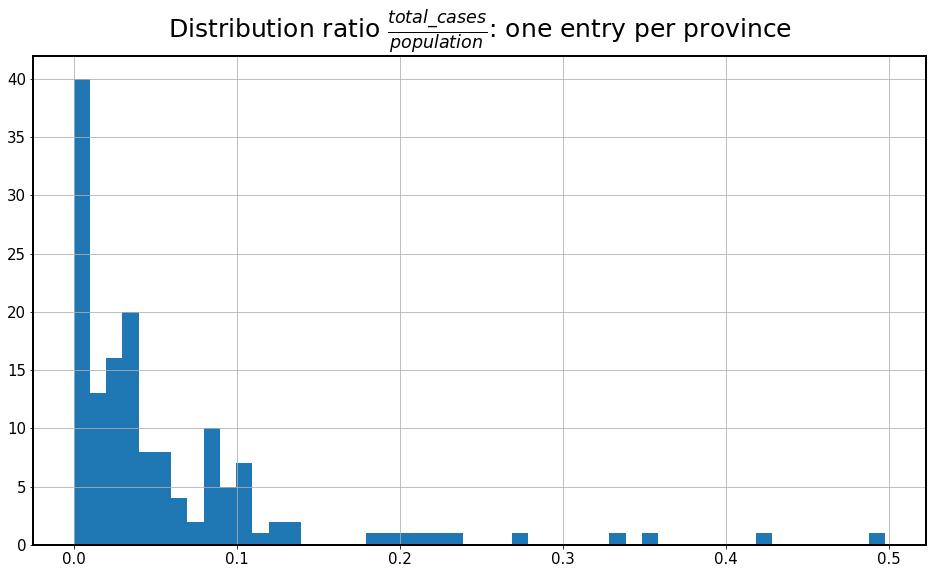

In [67]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['figure.figsize'] = [16, 9]

plt.hist(last_update['frac'], bins=50)
plt.title(r"Distribution ratio $\frac{total\_cases}{population}$: one entry per province")
plt.grid()

Saving figure total_cases_region_name_plot_sns


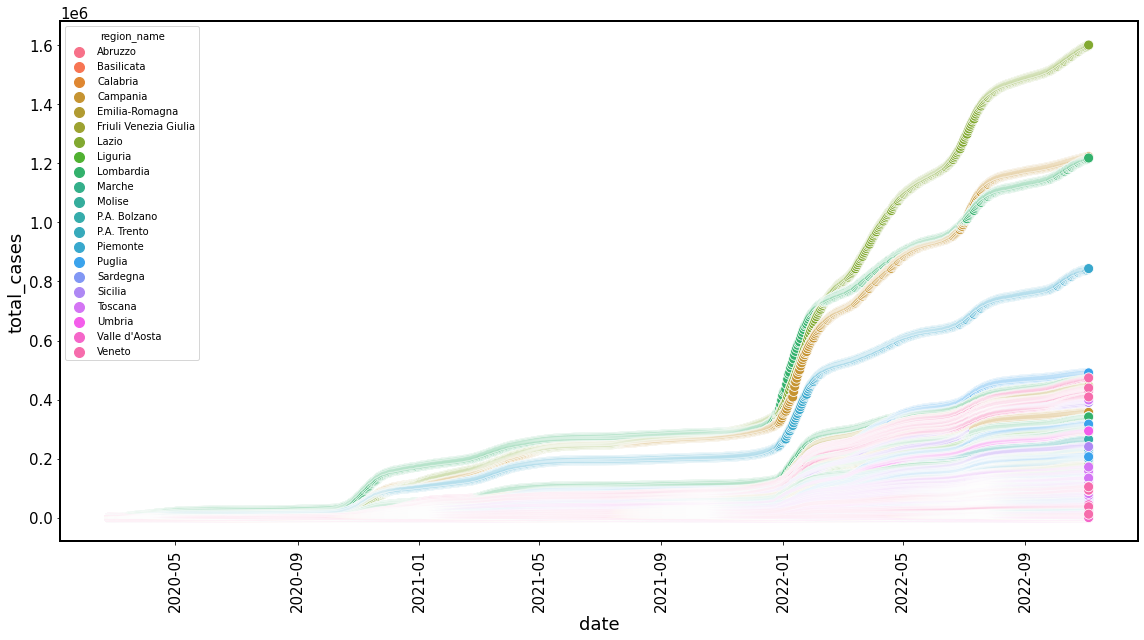

In [68]:
sns.scatterplot(data=cp_df_new, x='date', y='total_cases', hue="region_name")
plt.xticks(rotation=90)
save_fig("total_cases_region_name_plot_sns")
plt.show()

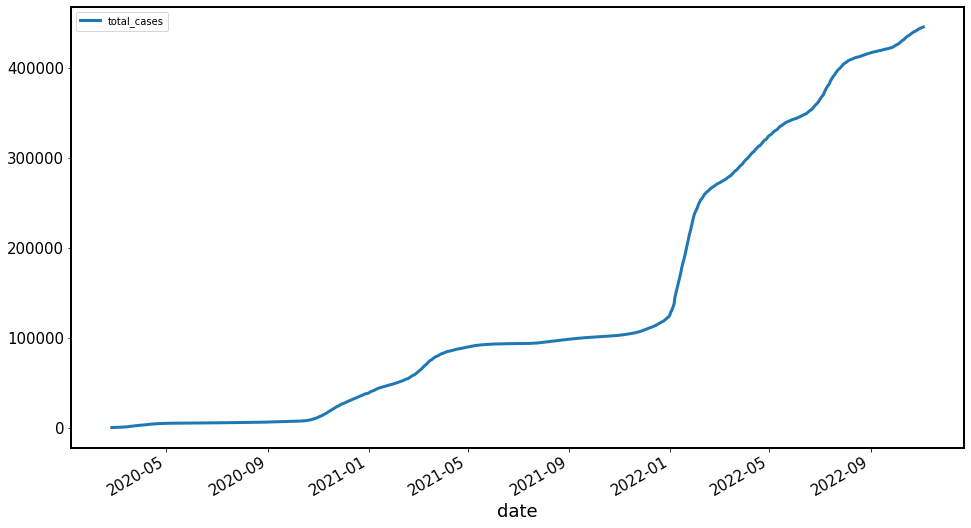

In [69]:
cp_df_new.query("region_name == 'Emilia-Romagna'")[['date','total_cases']].groupby('date').max().plot()
plt.show()

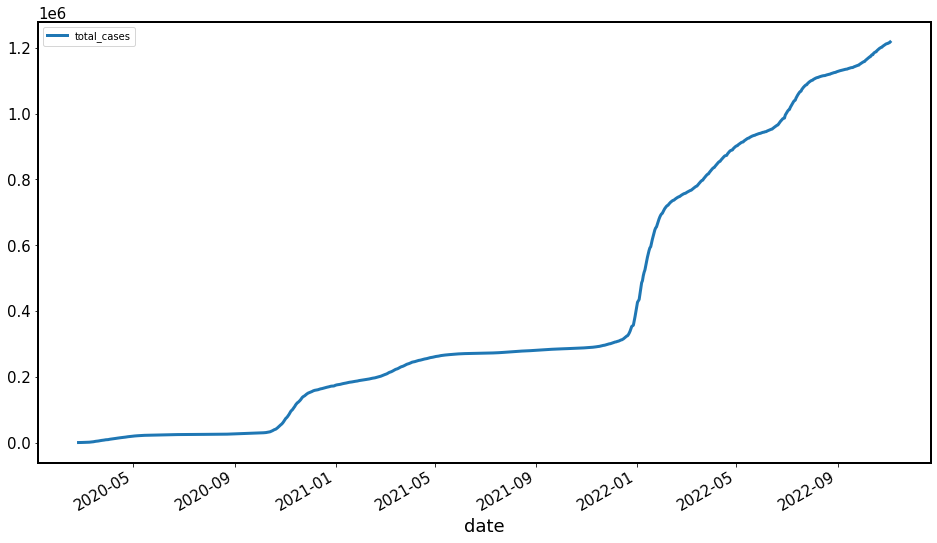

In [70]:
cp_df_new.query("region_name == 'Lombardia'")[['date','total_cases']].groupby('date').max().plot()
plt.show()